In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
from math import sin as sine
sin=np.vectorize(sine)
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
file_1 = ROOT.TFile.Open("run3a_NE_nbinshift_13.root")
hist_1 = ROOT.TH1D()
hcov_1 = ROOT.TH2D()
hist_1 = file_1.Get("calo_histogram_sum_ratio")
hcov_1 = file_1.Get("hcov")

file_2 = ROOT.TFile.Open("run3a_NE_nbinshift_14.root")
hist_2 = ROOT.TH1D()
hcov_2 = ROOT.TH2D()
hist_2 = file_2.Get("calo_histogram_sum_ratio")
hcov_2 = file_2.Get("hcov")

file_3 = ROOT.TFile.Open("run3a_NE_nbinshift_15.root")
hist_3 = ROOT.TH1D()
hcov_3 = ROOT.TH2D()
hist_3 = file_3.Get("calo_histogram_sum_ratio")
hcov_3 = file_3.Get("hcov")

file_4 = ROOT.TFile.Open("run3a_NE_nbinshift_16.root")
hist_4 = ROOT.TH1D()
hcov_4 = ROOT.TH2D()
hist_4 = file_4.Get("calo_histogram_sum_ratio")
hcov_4 = file_4.Get("hcov")



In [3]:
fit_start=30000
fit_stop=305000
fit_range=hist_1.FindBin(fit_stop)-hist_1.FindBin(fit_start)+1
y_val=np.empty(shape=(21,fit_range))
y_err=np.empty(shape=(21,fit_range))
x_val=np.empty(shape=(21,fit_range))
y_cov=np.empty(shape=(21,fit_range,fit_range))  

In [4]:
%%time
for ibin in range (0,fit_range):
    y_val[0][ibin]=hist_1.GetBinContent(ibin+hist_1.FindBin(fit_start))
    y_err[0][ibin]=hist_1.GetBinError(ibin+hist_1.FindBin(fit_start))
    x_val[0][ibin]=hist_1.GetBinCenter(ibin+hist_1.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[0][irow][icol]=hcov_1.GetBinContent(irow+hist_1.FindBin(fit_start),icol+hist_1.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[1][ibin]=hist_2.GetBinContent(ibin+hist_2.FindBin(fit_start))
    y_err[1][ibin]=hist_2.GetBinError(ibin+hist_2.FindBin(fit_start))
    x_val[1][ibin]=hist_2.GetBinCenter(ibin+hist_2.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[1][irow][icol]=hcov_2.GetBinContent(irow+hist_2.FindBin(fit_start),icol+hist_2.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[2][ibin]=hist_3.GetBinContent(ibin+hist_3.FindBin(fit_start))
    y_err[2][ibin]=hist_3.GetBinError(ibin+hist_3.FindBin(fit_start))
    x_val[2][ibin]=hist_3.GetBinCenter(ibin+hist_3.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[2][irow][icol]=hcov_3.GetBinContent(irow+hist_3.FindBin(fit_start),icol+hist_3.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[3][ibin]=hist_4.GetBinContent(ibin+hist_4.FindBin(fit_start))
    y_err[3][ibin]=hist_4.GetBinError(ibin+hist_4.FindBin(fit_start))
    x_val[3][ibin]=hist_4.GetBinCenter(ibin+hist_4.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[3][irow][icol]=hcov_4.GetBinContent(irow+hist_4.FindBin(fit_start),icol+hist_4.FindBin(fit_start))
        



CPU times: user 23.4 s, sys: 5.18 s, total: 28.6 s
Wall time: 28.5 s


In [5]:
for icalo in range(0,4):
    mat=np.linalg.eigvalsh(y_cov[icalo])
    for irow in range (0, fit_range):
        if mat[irow]<=0:
            print(icalo,irow,"\n")

In [6]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [7]:
T_a_true=4365.411
#nbinshift=int((0.5*T_a_true)/hist_2.GetBinWidth(1))
#T_a=2*nbinshift*hist_2.GetBinWidth(1)

asym=np.empty(4)
dasym=np.empty(4)
rval=np.empty(4)
drval=np.empty(4)
phi=np.empty(4)
dphi=np.empty(4)

calonum=np.empty(4)
red_chi2=np.empty(4)


In [8]:
def fit_func(time: np.double,
             asym: np.double = 0.0, 
             R: np.double = 0.0, 
             phi: np.double = 0.0,
             asym_cbo = 0.0,
             tau_cbo = 0.0,
             omega_cbo = 0.0,
             phi_cbo = 0.0,
             asym_cbo_A = 0.0,
             phi_cbo_A=0.0,
             A_cbo_phi= 0.0,
             phi_cbo_phi=0.0,
             asym_vw= 0.0,
             tau_vw = 0.0,
             omega_vw = 0.0,
             phi_vw = 0.0,
             asym_vbo= 0.0,
             tau_vbo = 0.0,
             omega_vbo = 0.0,
             phi_vbo = 0.0,
             asym_2cbo= 0.0,
             phi_2cbo = 0.0,
             tau_rlx = 0.0,
             A_cbot = 0.0,
             tau_cbot = 0.0,
             A_cbovw = 0.0,
             phi_cbovw = 0.0)-> np.double:
    
    tau_cbovw = 17680
    omega_cbovw = 0.012
    
    T_a=2*nbinshift*hist_2.GetBinWidth(1)
    
    omega_cbot=omega_cbo*(1+A_cbot*exp(-time/tau_cbot))
    omega_cbotf=omega_cbo*(1+A_cbot*exp(-(time+T_a/2)/tau_cbot))
    omega_cbotb=omega_cbo*(1+A_cbot*exp(-(time-T_a/2)/tau_cbot))
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo))
    
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo_A))
    
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo_phi))
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    
    N2cbo=(asym_2cbo*exp(-2*time/tau_cbo)*cos(2*omega_cbot*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-2*(time + T_a/2)/tau_cbo)*cos(2*omega_cbotf*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-2*(time - T_a/2)/tau_cbo)*cos(2*omega_cbotb*(time - T_a/2) - phi_2cbo))
    
    Ncbovw=(1+ A_cbovw*exp(-time/tau_cbovw)*cos(omega_cbovw*time - phi_cbovw))
    Ncbovwf=(1+ A_cbovw*exp(-(time + T_a/2)/tau_cbovw)*cos(omega_cbovw*(time + T_a/2) - phi_cbovw))
    Ncbovwb=(1+ A_cbovw*exp(-(time - T_a/2)/tau_cbovw)*cos(omega_cbovw*(time - T_a/2) - phi_cbovw))

    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    
    f=(1+ asym*exp(-time/tau_rlx)*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*exp(-(time+T_a/2)/tau_rlx)*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*exp(-(time-T_a/2)/tau_rlx)*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo*Ncbovw - ff*Ncbof*Nvwf*Nvbof*Ncbovwf - fb*Ncbob*Nvwb*Nvbob*Ncbovwb)/(2*f*Ncbo*Nvw*Nvbo*Ncbovw + ff*Ncbof*Nvwf*Nvbof*Ncbovwf + fb*Ncbob*Nvwb*Nvbob*Ncbovwb)

In [9]:
nbinshift=13

In [10]:
p_init=[2.28839e-01,
        0.000000,
        4.02000e+00,
        2.42604e-03,
        2.54062e+05,
        2.330e-03,
        5.56481e-01,
        6.91318e-04,
        -5.78075e+00,
        6.39026e-05,
        3.52887e+01,
        2.36536e-04,
        1.38419e+05,
        1.389e-02,
        2.73495e-01,
        -1.00112e-03,
        3.48295e+04,
        1.407e-02,
        -1.99555e+01,
        1.10668e-04,
        3.06805e+00,
        3.7000e+08,
        0.0047,
        23100,
        0.00014,
        4.2]

In [11]:
%%time
for icalo in range(0,4): 
    
    p_init_final=p_init
    
    pars2, cov_final = opt.curve_fit(f=fit_func, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init_final, sigma=y_cov[icalo])
    
    
    stdevs=np.sqrt(np.diag(cov_final))
    
    chi2=np.dot((np.transpose(y_val[icalo]-fit_func(x_val[icalo], *pars2))),(np.dot((np.linalg.inv(y_cov[icalo])),(y_val[icalo]-fit_func(x_val[icalo], *pars2)))))
    red_chi2[icalo]=chi2/(fit_range-len(pars2))
    calonum[icalo]=icalo+1
    
    asym[icalo]=pars2[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars2[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars2[2]
    dphi[icalo]=stdevs[2]
    
    
    p_init_final=pars2 
    
    nbinshift=nbinshift+1
    


CPU times: user 30.4 s, sys: 4.91 s, total: 35.3 s
Wall time: 21.8 s


In [12]:
nbinshift=[1.950,2.100,2.250,2.400]

In [13]:
len(rval)

4

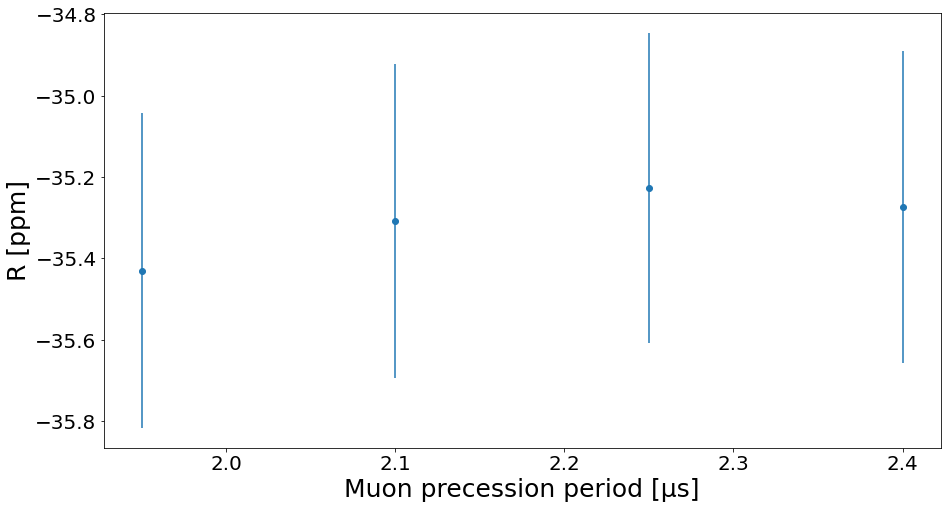

In [14]:
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(nbinshift, rval, yerr=drval, fmt="o")
plt.xlabel('Muon precession period [µs]',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
#plt.savefig('run2_caloscan_R.jpg')

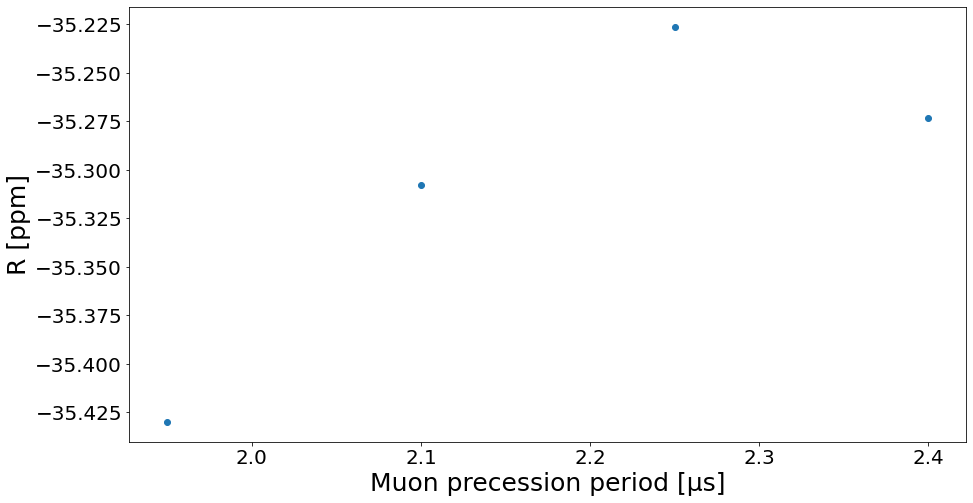

In [21]:
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(nbinshift, rval, yerr=0, fmt="o")
plt.xlabel('Muon precession period [µs]',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()

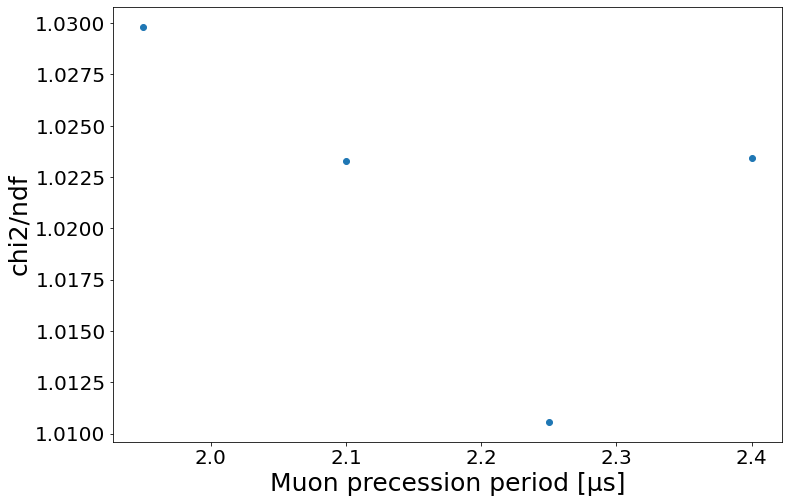

In [15]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(nbinshift, red_chi2, yerr=0, fmt="o")
plt.xlabel('Muon precession period [µs]',fontsize=25)
plt.ylabel('chi2/ndf',fontsize=25)
plt.show()

In [16]:
rval

array([-35.42993284, -35.30790924, -35.22624838, -35.27354631])

In [17]:
drval

array([0.38677508, 0.38473049, 0.38089461, 0.38220467])

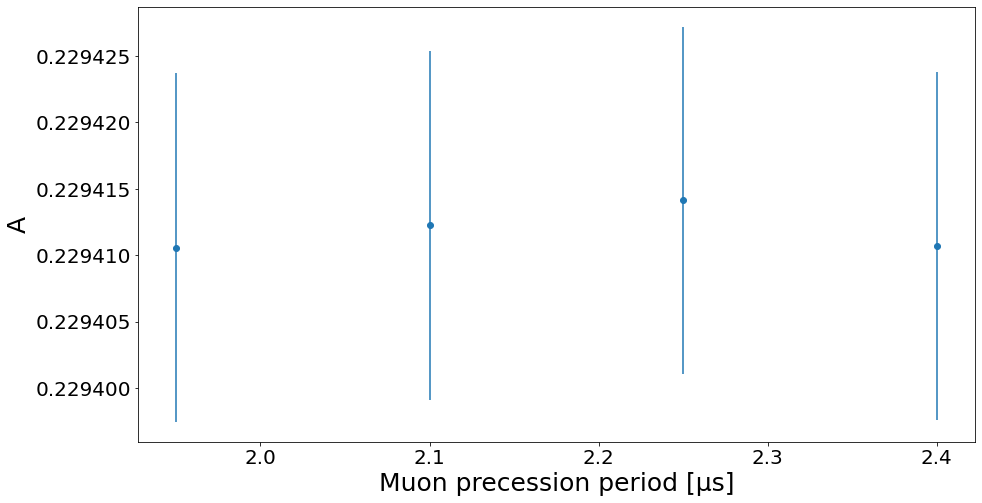

In [18]:
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(nbinshift, asym, yerr=dasym, fmt="o")
plt.xlabel('Muon precession period [µs]',fontsize=25)
plt.ylabel('A',fontsize=25)
plt.show()

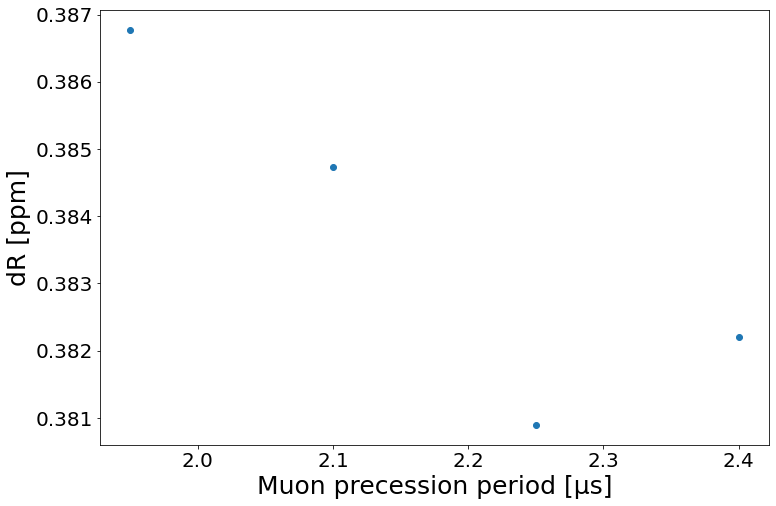

In [19]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(nbinshift, drval, yerr=0, fmt="o")
plt.xlabel('Muon precession period [µs]',fontsize=25)
plt.ylabel('dR [ppm]',fontsize=25)
plt.show()

In [20]:
red_chi2

array([1.02982673, 1.02327128, 1.01055958, 1.02340522])